In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8,5)
df = pd.read_csv('nepal_seismicity_master.csv')

In [4]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2733 entries, 0 to 2732
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dt                     2733 non-null   object 
 1   lat                    2733 non-null   float64
 2   lon                    2733 non-null   float64
 3   depth                  1536 non-null   float64
 4   mag                    2733 non-null   float64
 5   place                  2733 non-null   object 
 6   source                 2733 non-null   object 
 7   depth_log              1536 non-null   float64
 8   lat_offset             2733 non-null   float64
 9   lon_offset             2733 non-null   float64
 10  year                   2733 non-null   int64  
 11  month_sin              2733 non-null   float64
 12  month_cos              2733 non-null   float64
 13  hour_sin               2733 non-null   float64
 14  hour_cos               2733 non-null   float64
 15  roll

In [5]:
df['dt'].head(10)

0    1990-01-09 02:29:26.690000+00:00
1    1990-01-10 23:01:21.960000+00:00
2    1990-01-30 15:06:26.080000+00:00
3    1990-02-09 15:51:23.020000+00:00
4    1990-02-21 07:21:17.300000+00:00
5    1990-03-01 18:47:26.790000+00:00
6    1990-05-20 09:10:02.320000+00:00
7    1990-05-20 18:01:57.390000+00:00
8    1990-09-15 06:11:13.790000+00:00
9    1990-10-14 09:52:41.010000+00:00
Name: dt, dtype: object

In [7]:
df['dt'] = pd.to_datetime(
    df['dt'],
    format='mixed',   # handles mixed timestamp formats
    utc=True
)

In [8]:
df['dt'].dtype

datetime64[ns, UTC]

In [9]:
df['year'] = df['dt'].dt.year
df['month'] = df['dt'].dt.month
df['day'] = df['dt'].dt.day
df['hour'] = df['dt'].dt.hour
df['day_of_week'] = df['dt'].dt.day_name()
df['month_name'] = df['dt'].dt.month_name()

In [10]:
df[['dt','year','month','hour','month_name']].head()

dt  year  month  hour month_name
0 1990-01-09 02:29:26.690000+00:00  1990      1     2    January
1 1990-01-10 23:01:21.960000+00:00  1990      1    23    January
2 1990-01-30 15:06:26.080000+00:00  1990      1    15    January
3 1990-02-09 15:51:23.020000+00:00  1990      2    15   February
4 1990-02-21 07:21:17.300000+00:00  1990      2     7   February

In [11]:
df.isna().sum()

dt                          0
lat                         0
lon                         0
depth                    1197
mag                         0
place                       0
source                      0
depth_log                1197
lat_offset                  0
lon_offset                  0
year                        0
month_sin                   0
month_cos                   0
hour_sin                    0
hour_cos                    0
rolling_count_7d            0
rolling_count_30d           0
rolling_mean_mag_30d        0
days_since_last_major       0
is_major                    0
month                       0
day                         0
hour                        0
day_of_week                 0
month_name                  0
dtype: int64

In [12]:
df['depth'].describe()

count    1536.000000
mean       21.747895
std        16.395891
min         2.000000
25%        10.000000
50%        10.000000
75%        33.000000
max       143.200000
Name: depth, dtype: float64

In [13]:
median_depth = df['depth'].median()
median_depth

np.float64(10.0)

In [14]:
df['depth'] = df['depth'].fillna(median_depth)

In [15]:
df['depth_log'] = np.log1p(df['depth'])

In [16]:
df[['depth','depth_log']].head()

depth  depth_log
0   79.1   4.383276
1   68.5   4.241327
2   52.4   3.977811
3   33.0   3.526361
4   33.0   3.526361

In [17]:
df.isna().sum()

dt                       0
lat                      0
lon                      0
depth                    0
mag                      0
place                    0
source                   0
depth_log                0
lat_offset               0
lon_offset               0
year                     0
month_sin                0
month_cos                0
hour_sin                 0
hour_cos                 0
rolling_count_7d         0
rolling_count_30d        0
rolling_mean_mag_30d     0
days_since_last_major    0
is_major                 0
month                    0
day                      0
hour                     0
day_of_week              0
month_name               0
dtype: int64

In [18]:
df['energy_proxy'] = df['mag'] ** 1.5
df['severity_index'] = df['mag'] * df['depth_log']

In [19]:
df[['mag','depth','energy_proxy','severity_index']].head()

mag  depth  energy_proxy  severity_index
0  5.5   79.1     12.898643       24.108017
1  4.7   68.5     10.189357       19.934236
2  4.5   52.4      9.545942       17.900148
3  4.6   33.0      9.865901       16.221258
4  4.8   33.0     10.516273       16.926531

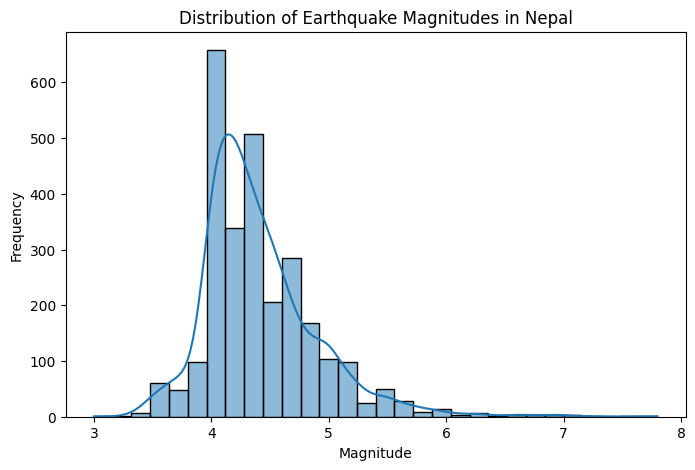

In [20]:
# Magnitude Distribution (Core Seismology)
plt.figure(figsize=(8,5))
sns.histplot(df['mag'], bins=30, kde=True)
plt.title("Distribution of Earthquake Magnitudes in Nepal")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()


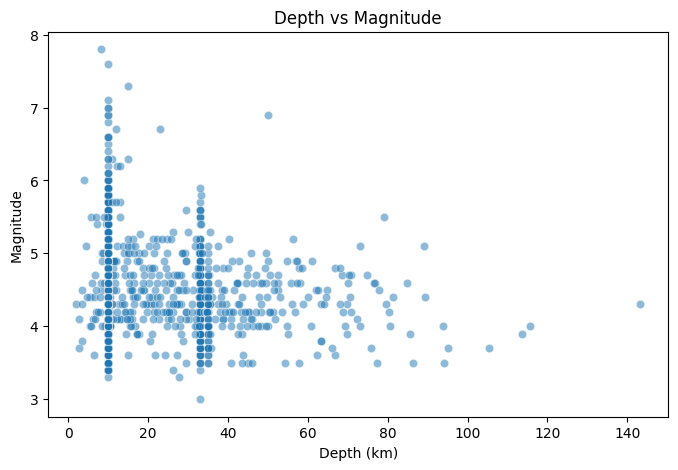

In [21]:
# Depth vs Magnitude (Physical Meaning)
plt.figure(figsize=(8,5))
sns.scatterplot(x='depth', y='mag', data=df, alpha=0.5)
plt.title("Depth vs Magnitude")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.show()

In [22]:
df[['depth','mag']].corr()

depth       mag
depth  1.000000 -0.071612
mag   -0.071612  1.000000

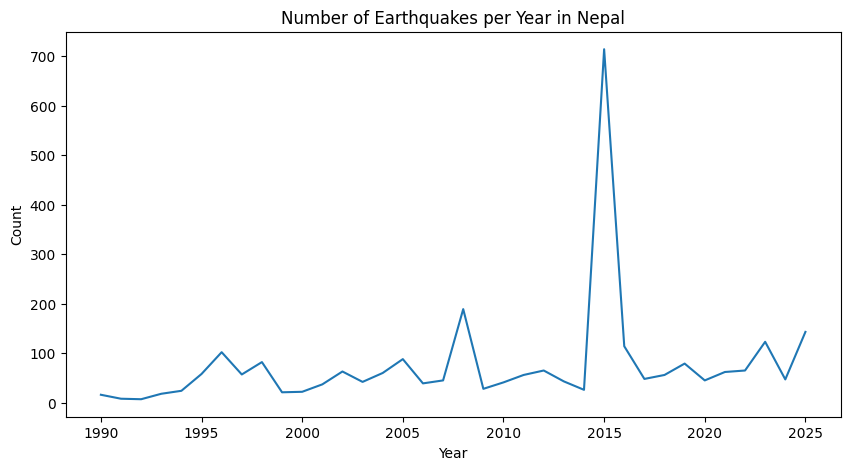

In [23]:
# Long-Term Earthquake Trend
yearly = df.groupby('year')['mag'].count()

plt.figure(figsize=(10,5))
yearly.plot()
plt.title("Number of Earthquakes per Year in Nepal")
plt.ylabel("Count")
plt.xlabel("Year")
plt.show()

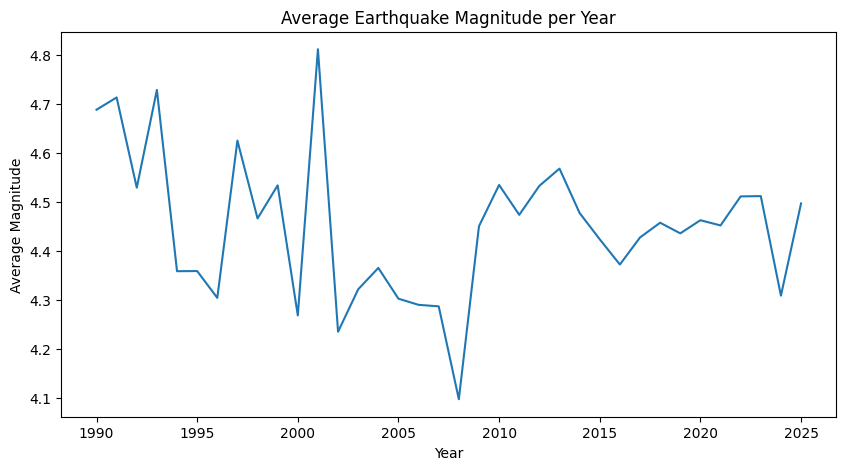

In [24]:
# Are Earthquakes Getting Stronger?
yearly_mag = df.groupby('year')['mag'].mean()

plt.figure(figsize=(10,5))
yearly_mag.plot()
plt.title("Average Earthquake Magnitude per Year")
plt.ylabel("Average Magnitude")
plt.xlabel("Year")
plt.show()

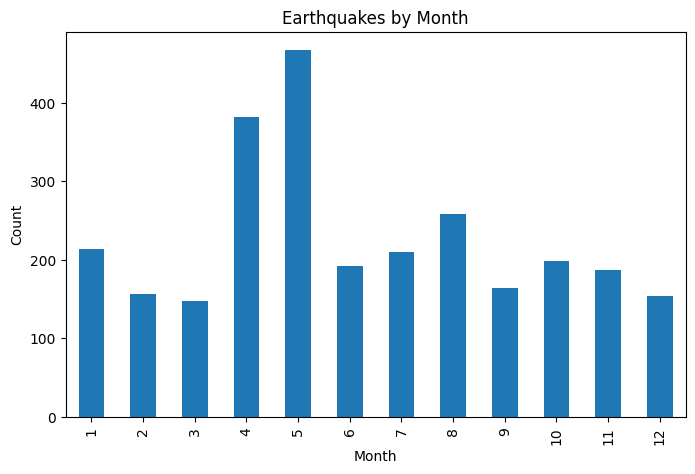

In [25]:
# Seasonal Behavior
monthly = df.groupby('month')['mag'].count()

plt.figure(figsize=(8,5))
monthly.plot(kind='bar')
plt.title("Earthquakes by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

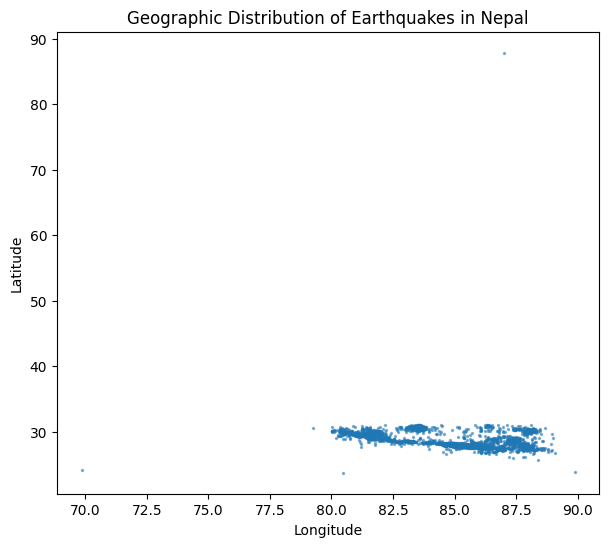

In [26]:
# Where do earthquakes concentrate, and how does this change over time?
# Geographic Spread of Earthquakes
plt.figure(figsize=(7,6))
plt.scatter(df['lon'], df['lat'], s=2, alpha=0.5)
plt.title("Geographic Distribution of Earthquakes in Nepal")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# This gives the raw seismic footprint of Nepal

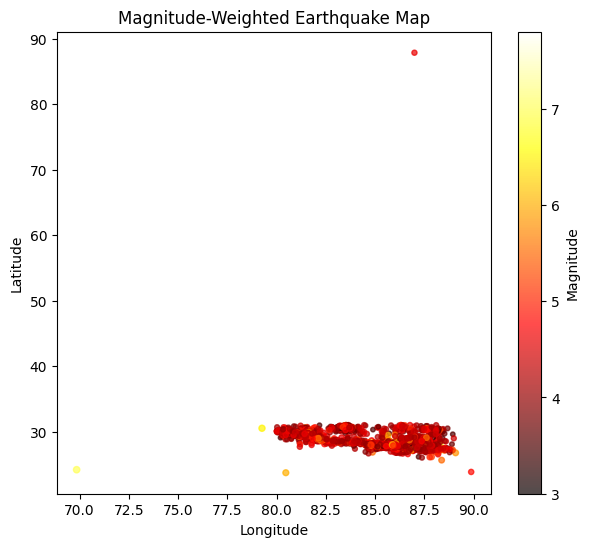

In [29]:
# Magnitude-Weighted Spatial View
plt.figure(figsize=(7,6))
plt.scatter(df['lon'], df['lat'], c=df['mag'], cmap='hot', s=df['mag']*3, alpha=0.7)
plt.colorbar(label="Magnitude")
plt.title("Magnitude-Weighted Earthquake Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
# This highlights danger zones.

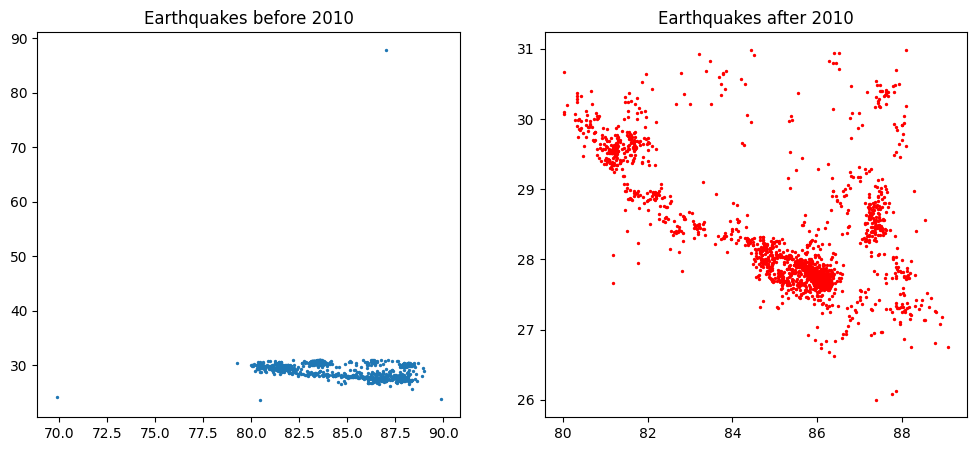

In [30]:
# Temporal Change in Spatial Activity
# split earthquakes by early vs recent years.
early = df[df['year'] < 2010]
recent = df[df['year'] >= 2010]

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(early['lon'], early['lat'], s=2)
plt.title("Earthquakes before 2010")

plt.subplot(1,2,2)
plt.scatter(recent['lon'], recent['lat'], s=2, color='red')
plt.title("Earthquakes after 2010")

plt.show()
# This shows seismic shift over time.

In [31]:
# “Earthquake events in Nepal are spatially clustered along tectonic fault zones, with noticeable intensification in certain regions in recent years.”

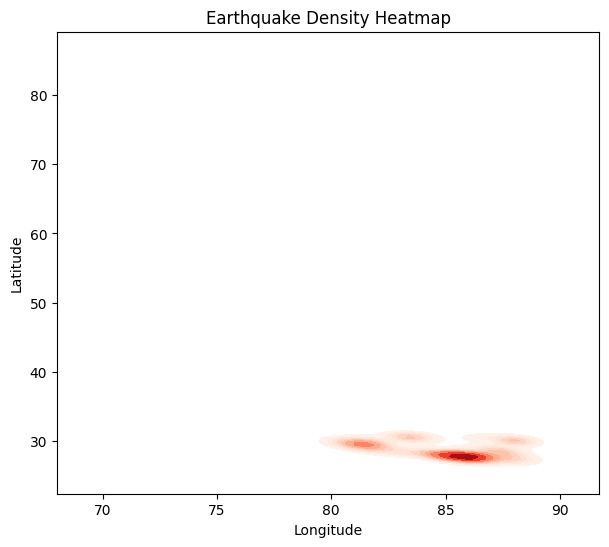

In [32]:
# High-Risk Zones (Density Estimation)
plt.figure(figsize=(7,6))
sns.kdeplot(x=df['lon'], y=df['lat'], fill=True, cmap="Reds")
plt.title("Earthquake Density Heatmap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
# This is a hotspot heatmap — extremely impressive.

In [33]:
# MACHINE LEARNING FOR SEISMIC RISK
Task	                What it does
Risk Classification	--> Predict Low / Moderate / High risk
Hotspot Clustering	--> Find seismic zones

In [34]:
# Create Risk Labels
df['risk'] = pd.cut(
    df['mag'],
    bins=[0, 4, 6, 10],
    labels=['Low', 'Moderate', 'High']
)

df['risk'].value_counts()
# This creates ground-truth risk categories.

risk
Moderate    2157
Low          549
High          27
Name: count, dtype: int64

In [35]:
# Prepare ML Features
# We use physically meaningful features:
features = [
    'depth_log',
    'lat_offset',
    'lon_offset',
    'month_sin',
    'month_cos',
    'hour_sin',
    'hour_cos',
    'rolling_count_7d',
    'rolling_count_30d',
    'rolling_mean_mag_30d',
    'days_since_last_major'
]

X = df[features]
y = df['risk']


In [36]:
# Train/Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [37]:
# Train Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=300, random_state=42)

In [38]:
# Evaluate Model
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.00      0.00      0.00         7
         Low       0.55      0.17      0.26       137
    Moderate       0.81      0.96      0.88       540

    accuracy                           0.80       684
   macro avg       0.45      0.38      0.38       684
weighted avg       0.75      0.80      0.75       684



C:\Users\bhupi\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\bhupi\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\bhupi\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [39]:
df['risk'].value_counts(normalize=True)

risk
Moderate    0.789243
Low         0.200878
High        0.009879
Name: proportion, dtype: float64

In [40]:
model = RandomForestClassifier(
    n_estimators=400,
    max_depth=14,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=14, n_estimators=400,
                       random_state=42)

In [41]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))
# “Because high-magnitude earthquakes are rare, class imbalance was handled using weighted Random Forest to prevent model bias.”

              precision    recall  f1-score   support

        High       1.00      0.14      0.25         7
         Low       0.48      0.18      0.26       137
    Moderate       0.81      0.95      0.88       540

    accuracy                           0.79       684
   macro avg       0.76      0.42      0.46       684
weighted avg       0.75      0.79      0.75       684



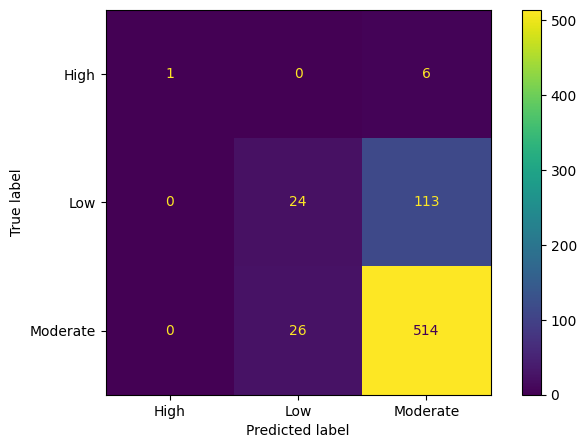

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

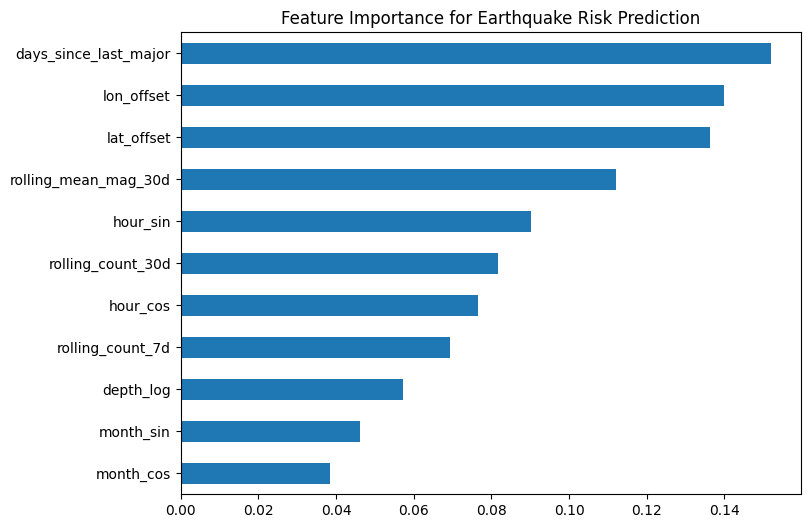

In [45]:
# Feature Importance (Explainability)
import pandas as pd

importance = pd.Series(model.feature_importances_, index=features)
importance.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance for Earthquake Risk Prediction")
plt.show()

In [46]:
# Where do earthquakes concentrate?
# Which zones are dangerous?
# Prepare Data for Clustering
from sklearn.preprocessing import StandardScaler

cluster_features = df[['lat', 'lon', 'depth', 'mag']].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_features)

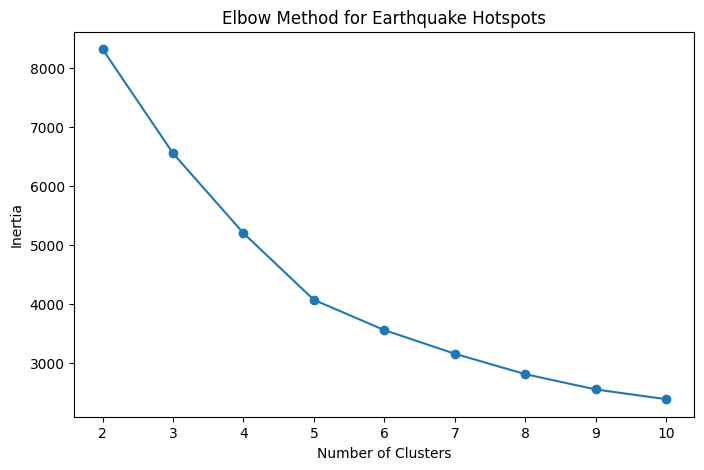

In [47]:
# Find Optimal Number of Clusters (Elbow Method)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2,11), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Earthquake Hotspots")
plt.show()

In [48]:
# Train KMeans Hotspot Model
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['hotspot'] = kmeans.fit_predict(X_scaled)

In [55]:
# Visualize Hotspots on World Map
import plotly.express as px

fig = px.scatter_geo(
    df,
    lat='lat',
    lon='lon',
    color='hotspot',
    size='mag',
    hover_name='place',
    title="🌍 Earthquake Hotspots Detected by AI",
    projection="natural earth"
)

fig.show()

In [53]:
# Analyze Hotspot Risk
df.groupby('hotspot')[['mag','depth']].mean().sort_values('mag', ascending=False)

mag      depth
hotspot                     
4        5.324056  12.411081
3        4.600000  10.000000
1        4.288529  14.989789
0        4.277273  41.313313
2        4.259852  10.321829

In [56]:
# “We applied unsupervised K-Means clustering on latitude, longitude, depth and magnitude to identify global seismic zones. High-magnitude dense clusters represent earthquake-prone regions.”

In [57]:
# AI-Powered Earthquake Risk Map
# Add ML Risk Prediction to Dataset
df['predicted_risk'] = model.predict(X)

In [58]:
df[['mag','risk','predicted_risk']].head()

mag      risk predicted_risk
0  5.5  Moderate       Moderate
1  4.7  Moderate       Moderate
2  4.5  Moderate       Moderate
3  4.6  Moderate       Moderate
4  4.8  Moderate       Moderate

In [59]:
# Create AI Risk Score
df['risk_score'] = (
    df['severity_index'] * 0.6 +
    df['rolling_mean_mag_30d'] * 0.3 +
    df['rolling_count_30d'] * 0.1
)

In [60]:
# Normalize Risk Score (0–1)
df['risk_score_norm'] = (df['risk_score'] - df['risk_score'].min()) / (
    df['risk_score'].max() - df['risk_score'].min()
)

In [63]:
# Create AI Risk Map (Professional GIS)
import folium

risk_map = folium.Map(location=[28.2, 84], zoom_start=7, tiles="cartodbpositron")

for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5 + row['risk_score_norm']*10,
        color='red' if row['predicted_risk']=='High' else 'orange' if row['predicted_risk']=='Moderate' else 'green',
        fill=True,
        fill_opacity=0.7,
        popup=f"""
        <b>Location:</b> {row['place']}<br>
        <b>Magnitude:</b> {row['mag']}<br>
        <b>Depth:</b> {row['depth']} km<br>
        <b>Predicted Risk:</b> {row['predicted_risk']}<br>
        <b>Risk Score:</b> {round(row['risk_score_norm'],2)}
        """
    ).add_to(risk_map)

risk_map

In [64]:
risk_map.save("AI_Earthquake_Risk_Map_Nepal.html")

In [65]:
# DEEP LEARNING — EARTHQUAKE FORECASTING WITH LSTM
df = df.sort_values('dt')

In [66]:
# Build Time-Series Features
df['energy'] = 10 ** (1.5 * df['mag'])
df['target'] = df['energy'].rolling(7).sum().shift(-1)
df = df.dropna()

In [67]:
# Select Input Features
features = [
    'mag','depth','energy',
    'rolling_count_7d','rolling_count_30d',
    'rolling_mean_mag_30d','days_since_last_major'
]

X = df[features].values
y = df['target'].values

In [68]:
# Scale Data (MANDATORY for Neural Networks)
from sklearn.preprocessing import MinMaxScaler

sx = MinMaxScaler()
sy = MinMaxScaler()

X = sx.fit_transform(X)
y = sy.fit_transform(y.reshape(-1,1))

In [69]:
# Create Sequences (LSTM needs memory)
import numpy as np

def make_sequences(X, y, window=30):
    xs, ys = [], []
    for i in range(len(X)-window):
        xs.append(X[i:i+window])
        ys.append(y[i+window])
    return np.array(xs), np.array(ys)

X_seq, y_seq = make_sequences(X, y)

In [70]:
# Train/Test Split
split = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

model = Sequential([
    Input(shape=(30, X_seq.shape[2])),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mse'
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 30, 128)             │          69,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 119,105 (465.25 KB)

 Trainable params: 119,105 (465.25 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
# Train AI
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0046 - val_loss: 5.1099e-05
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0031 - val_loss: 8.7737e-05
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0030 - val_loss: 6.7674e-05
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0028 - val_loss: 7.5963e-04
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0025 - val_loss: 1.9070e-04
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0022 - val_loss: 3.9503e-04
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0018 - val_loss: 1.8166e-04
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0020 - val_loss: 1.9957e-04
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0015 - val_loss: 2.4208e-04
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0013 - val_loss: 2.7887e-05
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0014 - val_loss: 3.4167e-05
Epoch 12/50
61/61 ━

In [78]:
# Predict Future Earthquake Risk
pred = model.predict(X_test)
pred = sy.inverse_transform(pred)
true = sy.inverse_transform(y_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step 


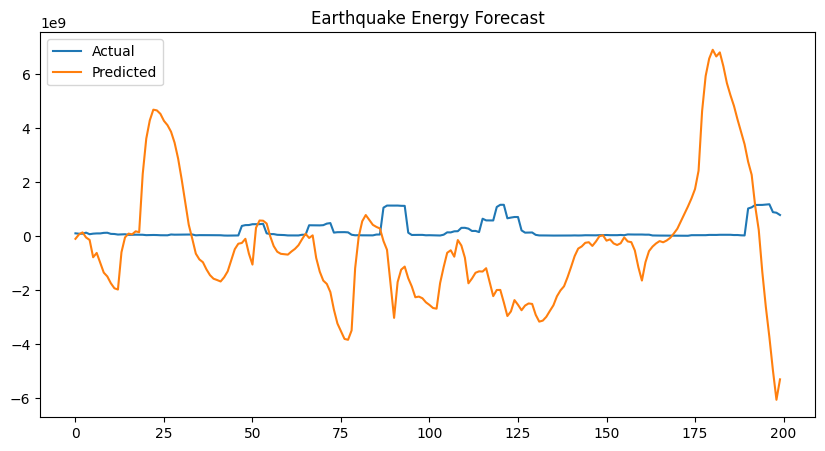

In [79]:
# Visualize Forecast Accuracy
plt.figure(figsize=(10,5))
plt.plot(true[:200], label='Actual')
plt.plot(pred[:200], label='Predicted')
plt.legend()
plt.title("Earthquake Energy Forecast")
plt.show()

In [80]:
df_powerbi = df.copy()

df_powerbi['risk_label'] = df_powerbi['risk'].map({0:'Low', 1:'Moderate', 2:'High'})

df_powerbi.to_csv("earthquake_powerbi.csv", index=False)

In [81]:
# Export LSTM Forecast
forecast = pd.DataFrame({
    "date": df['dt'].iloc[-len(pred):].values,
    "predicted_energy": pred.flatten()
})

forecast.to_csv("earthquake_forecast.csv", index=False)